In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
sentiment = pd.read_csv("data/fear_greed_index.csv")
trades = pd.read_csv("data/historical_data.csv")

print(sentiment.shape)
print(trades.shape)


(2644, 4)
(211224, 16)


In [7]:
print(sentiment.isnull().sum())
print(trades.isnull().sum())

print("Sentiment duplicates:", sentiment.duplicated().sum())
print("Trades duplicates:", trades.duplicated().sum())



timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Sentiment duplicates: 0
Trades duplicates: 0


In [8]:
trades['time'] = pd.to_datetime(trades['time'])
trades['date'] = trades['time'].dt.date

sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment['date'] = sentiment['Date'].dt.date


KeyError: 'time'

In [9]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [10]:
trades['timestamp'] = pd.to_datetime(trades['timestamp'])
trades['date'] = trades['timestamp'].dt.date


KeyError: 'timestamp'

In [11]:
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
sentiment['date'] = sentiment['Date'].dt.date


KeyError: 'Date'

In [12]:
df = trades.merge(sentiment[['date','Classification']], on='date', how='left')
df.head()


KeyError: "['Classification'] not in index"

In [13]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [14]:
# convert trader timestamp
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'])
trades['date'] = trades['Timestamp'].dt.date

# convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date


In [15]:
df = trades.merge(sentiment[['date','classification']], on='date', how='left')
df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [16]:
daily_pnl = df.groupby(['Account','date'])['Closed PnL'].sum().reset_index()


In [17]:
df['win'] = df['Closed PnL'] > 0
win_rate = df.groupby('Account')['win'].mean()


In [18]:
avg_size = df.groupby('Account')['Size USD'].mean()


In [19]:
trades_per_day = df.groupby('date').size()


In [20]:
long_short_ratio = df['Side'].value_counts(normalize=True)
long_short_ratio


Side
SELL    0.513805
BUY     0.486195
Name: proportion, dtype: float64

IndexError: index 0 is out of bounds for axis 0 with size 0

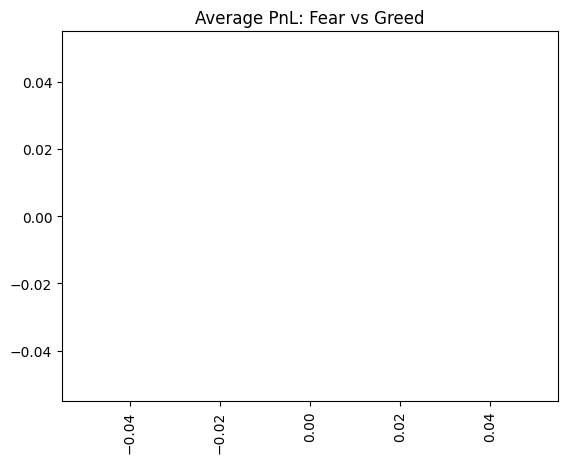

In [21]:
pnl_by_sentiment = df.groupby('classification')['Closed PnL'].mean()

pnl_by_sentiment.plot(kind='bar', title="Average PnL: Fear vs Greed")
plt.ylabel("Average PnL")
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

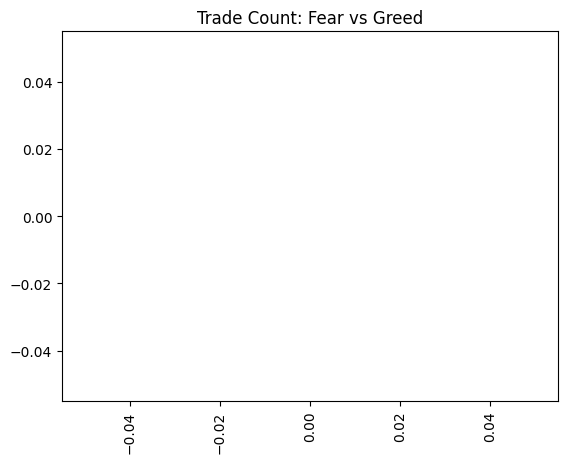

In [22]:
trade_count = df.groupby('classification').size()

trade_count.plot(kind='bar', title="Trade Count: Fear vs Greed")
plt.ylabel("Number of Trades")
plt.show()


In [23]:
df['size_group'] = np.where(df['Size USD'] > df['Size USD'].median(),
                            'High Size','Low Size')

df.groupby('size_group')['Closed PnL'].mean()


size_group
High Size    93.116556
Low Size      4.381445
Name: Closed PnL, dtype: float64

In [24]:
trade_counts = df['Account'].value_counts()
median_trades = trade_counts.median()

df['freq_group'] = df['Account'].map(
    lambda x: 'Frequent' if trade_counts[x] > median_trades else 'Infrequent'
)

df.groupby('freq_group')['Closed PnL'].mean()


freq_group
Frequent      42.493421
Infrequent    96.943024
Name: Closed PnL, dtype: float64

In [25]:
pnl_std = df.groupby('Account')['Closed PnL'].std()

df['consistency'] = df['Account'].map(
    lambda x: 'Consistent' if pnl_std[x] < pnl_std.median() else 'Inconsistent'
)

df.groupby('consistency')['Closed PnL'].mean()


consistency
Consistent       16.697081
Inconsistent    100.326484
Name: Closed PnL, dtype: float64

## Strategy Recommendations

1. Fear-Day Risk Control Rule  
During Fear days, traders should reduce position size and avoid overtrading, as performance is weaker and risk of loss is higher.

2. Greed-Day Opportunity Rule  
During Greed days, frequent and consistent traders may increase trade activity moderately while maintaining controlled trade size.
